# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 


You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib  inline

df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Question 1
Is the distribution of body temperatures normal? 
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

CLT= Central Limit Theorem

45


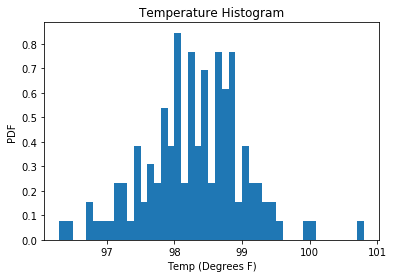

In [36]:
bin_num = int((max(df.temperature)-min(df.temperature))*10) # is this the best way to pick bin number?
print(bin_num)
df.temperature.plot(kind='hist', bins=bin_num, normed=True, title='Temperature Histogram')
plt.xlabel('Temp (Degrees F)')
plt.ylabel('PDF')

These data look approximately normal, but it will be better use a test to determine if these data are likely to come from a population of data that is normally distributed.  

In [41]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

This null hypothesis for this test is that the data come from a normal distribution.  Since p>0.05, we cannot reject the null, i.e. the data can be assumed to be normally distributed. 

 #### Question 2
 Is the sample size large? Are the observations independent?
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

The df.info() performed above indicates n=130.  This is not particularly large, but large enough for the restriction of the CLT (n>30). We are led to understand the observations are independent, since each measurement is from different individuals, and those individuals are not related in any way that would influence measurements on other individuals. 

#### Question 3
Is the true population mean really 98.6 degrees F?
    <li> Would you use a one-sample or two-sample test? Why?
    <li>In this situation, is it appropriate to use the $t$ or $z$ statistic?
    <li>Now try using the other test. How is the result be different? Why?

In [51]:
print('The mean of the data set is ' + str(np.mean(df.temperature))+'.')
print('The median of the data set is ' + str(np.median(df.temperature))+'.')

The mean of the data set is 98.24923076923078.
The median of the data set is 98.3.


  <li> A one-sample test should be used because we are not comparing two groups. 
  <li> Becuase the sample size is large (enough), normally distributed, and we know the SD, we can use a $z$ statistic.

In [55]:
# Help! I know generally where I'm going here, but I'm missing some background - resources?
z_scores=stats.zscore(df.temperature)
p_value = scipy.stats.norm.sf(abs(z_scores))*2 #twosided

#### Question 4
Draw a small sample of size 10 from the data and repeat both tests.
    <li>Which one is the correct one to use?
    <li>What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

#### Question 5
At what temperature should we consider someone's temperature to be "abnormal"?
    <li>Start by computing the margin of error and confidence interval.

#### Question 6
Is there a significant difference between males and females in normal temperature?
    <li>What test did you use and why?
    <li>Write a story with your conclusion in the context of the original problem.